In [74]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Creating a Data Set Using SKlearn
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

#Spliting data between training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=20)

#Changing datatype to float32
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_train = y_train.view(y_train.shape[0], 1)

In [75]:
#Model Setup
n_sample, n_features = X.shape
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [76]:
#Loss and Optimization
lr= 0.01
criteron = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
epochs = 1000

epoch: 10, loss = 4527.4746
epoch: 20, loss = 3342.7485
epoch: 30, loss = 2502.6313
epoch: 40, loss = 1904.4528
epoch: 50, loss = 1476.8817
epoch: 60, loss = 1170.1331
epoch: 70, loss = 949.3043
epoch: 80, loss = 789.8164
epoch: 90, loss = 674.2863
epoch: 100, loss = 590.3677
epoch: 110, loss = 529.2573
epoch: 120, loss = 484.6538
epoch: 130, loss = 452.0305
epoch: 140, loss = 428.1244
epoch: 150, loss = 410.5764
epoch: 160, loss = 397.6759
epoch: 170, loss = 388.1794
epoch: 180, loss = 381.1799
epoch: 190, loss = 376.0155
epoch: 200, loss = 372.2012
epoch: 210, loss = 369.3817
epoch: 220, loss = 367.2961
epoch: 230, loss = 365.7523
epoch: 240, loss = 364.6088
epoch: 250, loss = 363.7614
epoch: 260, loss = 363.1332
epoch: 270, loss = 362.6673
epoch: 280, loss = 362.3216
epoch: 290, loss = 362.0650
epoch: 300, loss = 361.8745
epoch: 310, loss = 361.7331
epoch: 320, loss = 361.6281
epoch: 330, loss = 361.5500
epoch: 340, loss = 361.4920
epoch: 350, loss = 361.4489
epoch: 360, loss = 361.

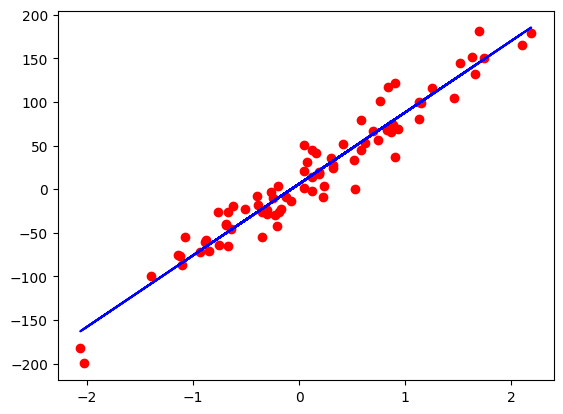

In [77]:
#Looping
for epoch in range(epochs):
  #Zeroing
  optimizer.zero_grad()

  y_pred = model(X_train)
  loss = criteron(y_pred, y_train)

  #Back prop
  loss.backward()

  #Updating
  optimizer.step()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

predicted = model(X_train).detach().numpy()
plt.plot(X_train, y_train, 'ro')
plt.plot(X_train, predicted, 'b')
plt.show()